In [50]:
import os 
import cv2
from PIL import Image
from patchify import patchify
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

<h1>Data Processing <h1>

In [2]:
root_path = '/dataset/'
base_directory = "dataset/"  # Root directory
sub_directories = ["images", "mask"] 
!ls -lah

total 100K
drwxrwxr-x  5 borhan borhan 4.0K Nov  8 11:43 .
drwxrwxr-x  3 borhan borhan 4.0K Nov  6 16:15 ..
-rw-rw-r--  1 borhan borhan  70K Nov  8 11:45 data_procesing.ipynb
drwxrwxr-x 10 borhan borhan 4.0K Nov  6 16:54 dataset
drwxrwxr-x  7 borhan borhan 4.0K Nov  6 16:15 .git
-rw-rw-r--  1 borhan borhan   27 Nov  7 11:04 .gitignore
-rw-rw-r--  1 borhan borhan  685 Nov  7 16:15 requirements.txt
drwxrwxr-x  6 borhan borhan 4.0K Nov  8 11:45 venv


In [3]:
images = []
masks= []


In [4]:

for path, dirs, files in os.walk(base_directory):
    dir_name = path.split(os.path.sep)[-1]
    print(path)
    if dir_name == "images": 
        for image in enumerate(files): 
            images.append(image)
    if dir_name == "masks": 
        for mask in enumerate(files): 
            masks.append(mask)

print(images)
print(masks)

dataset/
dataset/Tile 5
dataset/Tile 5/masks
dataset/Tile 5/images
dataset/Tile 7
dataset/Tile 7/masks
dataset/Tile 7/images
dataset/Tile 3
dataset/Tile 3/masks
dataset/Tile 3/images
dataset/Tile 6
dataset/Tile 6/masks
dataset/Tile 6/images
dataset/Tile 4
dataset/Tile 4/masks
dataset/Tile 4/images
dataset/Tile 8
dataset/Tile 8/masks
dataset/Tile 8/images
dataset/Tile 1
dataset/Tile 1/masks
dataset/Tile 1/images
dataset/Tile 2
dataset/Tile 2/masks
dataset/Tile 2/images
[(0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_part_003.jpg'), (2, 'image_part_008.jpg'), (3, 'image_part_001.jpg'), (4, 'image_part_009.jpg'), (5, 'image_part_002.jpg'), (6, 'image_part_005.jpg'), (7, 'image_part_006.jpg'), (8, 'image_part_004.jpg'), (0, 'image_part_007.jpg'), (1, 'image_pa

In [5]:
image_patch_size =  256

In [6]:
image = cv2.imread(f'{base_directory}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [7]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [12]:
min_max_scalar = MinMaxScaler()

In [38]:
#prepare the all images with patch size
image_dataset = []
mask_dataset = []
for image_type in  ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'
    for tile_id in range(1,8):
        for image_id in range(1,20):
            image = cv2.imread(f'{base_directory}Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
            if image is not None: 
                if image_type == 'masks':
                    wimage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                size_x = (image.shape[0]//image_patch_size)*image_patch_size
                size_y = (image.shape[1]//image_patch_size)*image_patch_size
                # print("{} --- {} -- {}".format(image.shape, size_x, size_y))
                image = Image.fromarray(image)
                image = image.crop((0,0, size_x, size_y))
                # print("{} --- {} ".format(image.size[0], image.size[1]))
                image = np.array(image)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                # print(len(patched_images))
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        individual_patched_image = patched_images[i,j,:,:]
                        if image_type == 'images':
                            individual_patched_image = min_max_scalar.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                        individual_patched_image = individual_patched_image[0]
                        # print(individual_patched_image.shape)
                        if image_type == 'images':
                             image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            mask_dataset.append(individual_patched_image)
                 

[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0013.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0014.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imread_('dataset/Tile 1/images/image_part_0015.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3088.528] global loadsave.cpp:241 findDecoder imr

In [39]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [42]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

546


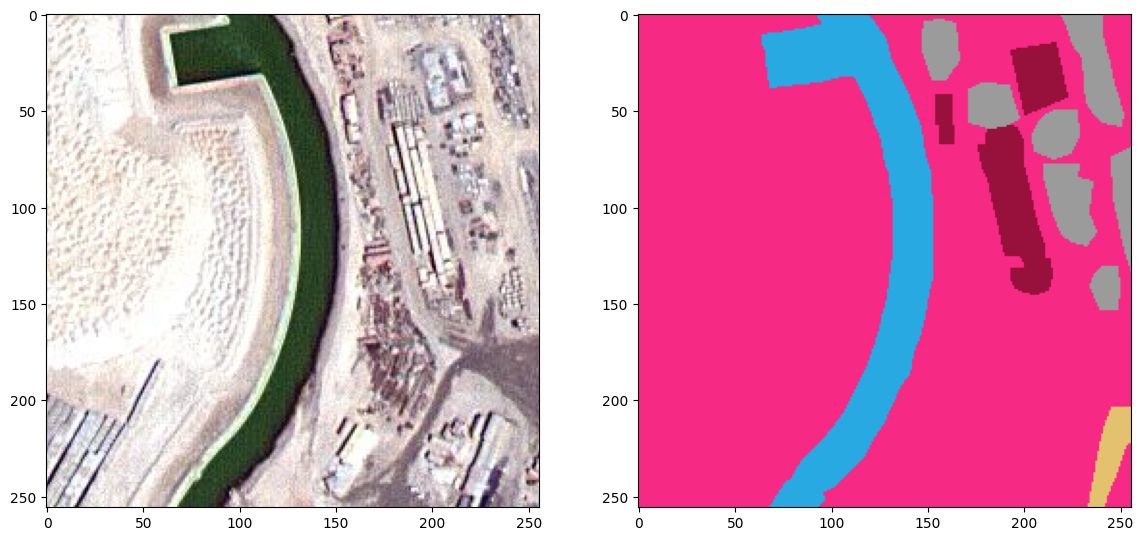

In [54]:
rand_image_id = random.randint(0, len(image_dataset))
print(rand_image_id)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[0])
plt.subplot(122)
plt.imshow(mask_dataset[0])